In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd

# find all 400 files fac

In [17]:
number = np.linspace(0,399,400)

In [18]:
NO = []
for n in number:
    if n == 327:
        pass
    elif n == 190:
        pass
    else:
        n_new = int(n)
        NO.append(n_new)

print(NO)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,

In [24]:
exist_fac = [] ##### fac condition lower limit
for i in NO:
    file_name = "KIC_17-trans_"+str(i)+"-5s_sub.txt"
    data = np.loadtxt(file_name)
    time = pd.Series(data[:,0])
    flux = pd.Series(data[:,1])
    lower_lim = data[0,4] # 3 sigma
    higher_lim = data[0,5] # 3 sigma
    L_bond = data[0,6] # ingress bound
    R_bond = data[0,7] # egress bound
    cL_bond = data[0,8] # left central bound
    cR_bond = data[0,9] # right central bound
    
    '''facula test-1'''
    ### time in central range ###
    x_time_c = time[time>=cL_bond][time<=cR_bond][flux<=lower_lim] ##### fac condition lower limit
    y_flux_c = flux[time>=cL_bond][time<=cR_bond][flux<=lower_lim] ##### fac condition lower limit
    ### find the peak time ###
    if len(y_flux_c)!= 0:
        x_peak = float(x_time_c[y_flux_c==min(y_flux_c)]) # time at flux peak ##### fac condition lower limit
        y_peak = float(y_flux_c[y_flux_c==min(y_flux_c)]) # flux peak ##### fac condition lower limit

    #     plt.plot(x_peak,y_peak,'r.') # peak point

        '''facula test-2'''
        ### split peak into 2 parts ###
        time_L = np.array(time[time<=x_peak])
        flux_L = np.array(flux[time<=x_peak])
        time_R = np.array(time[time>=x_peak])
        flux_R = np.array(flux[time>=x_peak])
        ### find the first point under y = 0 line from the peak###
        left_edge = []
        left_edge_flux = []
        for i_tL,v_fL in enumerate(flux_L): # left part
            if flux_L[-i_tL] >= 0 and i_tL != 0: ##### fac condition lower limit
                left_edge.append(time_L[-i_tL])
                left_edge_flux.append(flux_L[-i_tL])
        #         print(time_L[-i_tL])
        #         print(time_L[-i_tL],flux_L[-i_tL])
        right_edge = []    
        right_edge_flux = []
        for i_tR,v_fR in enumerate(flux_R): # right part
            if flux_R[i_tR] >= 0 and i_tR != 0: ##### fac condition lower limit
                right_edge.append(time_R[i_tR])
                right_edge_flux.append(flux_R[i_tR])
        #         print(time_R[i_tR],flux_R[i_tR])

        ### check the facula exist_fac ###
        time_dur = time[time>=left_edge[0]][time<=right_edge[0]].values # time_duration for fac/spot
        flux_dur = flux[time>=left_edge[0]][time<=right_edge[0]].values # flux of time_duration for fac/spot
        if len(time_dur) >= 3: # check

            '''facula test-3'''
            time2 = time[(time<=time_dur[0])|(time>=time_dur[-1])]
            flux2 = flux[(time<=time_dur[0])|(time>=time_dur[-1])]

            # while min(flux2)<=lower_lim:

            ### time in central range ###
            x_time_c2 = time2[time2>=cL_bond][time2<=cR_bond][flux2<=lower_lim] ##### fac condition lower limit
            y_flux_c2 = flux2[time2>=cL_bond][time2<=cR_bond][flux2<=lower_lim] ##### fac condition lower limit


            ### find the peak time ###
            if len(y_flux_c2)!= 0:
                x_peak2 = float(x_time_c2[y_flux_c2==min(y_flux_c2)]) # time at flux peak ##### fac condition lower limit
                y_peak2 = float(y_flux_c2[y_flux_c2==min(y_flux_c2)]) # flux peak ##### fac condition lower limit

                ### split peak into 2 parts ###
                time2_L = np.array(time2[time2<=x_peak2])
                flux2_L = np.array(flux2[time2<=x_peak2])
                time2_R = np.array(time2[time2>=x_peak2])
                flux2_R = np.array(flux2[time2>=x_peak2])
                ### find the first point under y = 0 line from the peak###
                left_edge2 = []
                left_edge2_flux = []
                for i_tL,v_fL in enumerate(flux2_L): # left part
                    if flux2_L[-i_tL] >= 0 and i_tL != 0: ##### fac condition lower limit
                        left_edge2.append(time2_L[-i_tL])
                        left_edge2_flux.append(flux2_L[-i_tL])
                #         print(time_L[-i_tL])
                #         print(time_L[-i_tL],flux_L[-i_tL])
                right_edge2 = []    
                right_edge2_flux = []
                for i_tR,v_fR in enumerate(flux2_R): # right part
                    if flux2_R[i_tR] >= 0 and i_tR != 0: ##### fac condition lower limit
                        right_edge2.append(time2_R[i_tR])
                        right_edge2_flux.append(flux2_R[i_tR])
                #         print(time_R[i_tR],flux_R[i_tR])

                ### check the facula exist_fac ###
                time_dur2 = time2[time2>=left_edge2[0]][time2<=right_edge2[0]].values # time_duration for fac/spot
                if len(time_dur2) >= 3: # check
                    exist_fac_txt = 2
        #             print(exist_fac_txt)
                else:
                    exist_fac_txt = 1
        #             print(exist_fac_txt)

                exist_fac.append(exist_fac_txt)
            else:
                exist_fac_txt = 1
                exist_fac.append(exist_fac_txt)
        else:
            exist_fac_txt = 0
            exist_fac.append(exist_fac_txt)
    else:
        exist_fac_txt = 0
        exist_fac.append(exist_fac_txt)
print(exist_fac)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 

In [25]:
len(exist_fac)

398

In [26]:
fac_number = sum(exist_fac)
print(fac_number)

285


# find all 400 files spot

In [7]:
exist_spot = [] ##### spot condition higher limit
for i in NO:
#     print(i)
    file_name = "KIC_17-trans_"+str(i)+"-5s_sub.txt"
    data = np.loadtxt(file_name)
    time = pd.Series(data[:,0])
    flux = pd.Series(data[:,1])
    higher_lim = data[0,4] # 3 sigma
    higher_lim = data[0,5] # 3 sigma
    L_bond = data[0,6] # ingress bound
    R_bond = data[0,7] # egress bound
    cL_bond = data[0,8] # left central bound
    cR_bond = data[0,9] # right central bound

    '''spot test-1'''
    ### time in central range ###
    x_time_c = time[time>=cL_bond][time<=cR_bond][flux>=higher_lim] # higher than 3 sigma
    y_flux_c = flux[time>=cL_bond][time<=cR_bond][flux>=higher_lim]
    ### find the peak time ###
    if len(y_flux_c)!= 0:
        x_peak = float(x_time_c[y_flux_c==max(y_flux_c)]) # time at flux peak 
        y_peak = float(y_flux_c[y_flux_c==max(y_flux_c)]) # flux peak 

    #     plt.plot(x_peak,y_peak,'r.') # peak point

        '''spot test-2'''
        ### split peak into 2 parts ###
        time_L = np.array(time[time<=x_peak])
        flux_L = np.array(flux[time<=x_peak])
        time_R = np.array(time[time>=x_peak])
        flux_R = np.array(flux[time>=x_peak])
        ### find the first point under y = 0 line from the peak###
        left_edge = []
        left_edge_flux = []
        for i_tL,v_fL in enumerate(flux_L): # left part
            if flux_L[-i_tL] <= 0 and i_tL != 0:
                left_edge.append(time_L[-i_tL])
                left_edge_flux.append(flux_L[-i_tL])
#                 print(time_L[-i_tL])
        #         print(time_L[-i_tL],flux_L[-i_tL])
        right_edge = []    
        right_edge_flux = []
        for i_tR,v_fR in enumerate(flux_R): # right part
            if flux_R[i_tR] <= 0 and i_tR != 0:
#                 print(flux_R[i_tR])
                right_edge.append(time_R[i_tR])
                right_edge_flux.append(flux_R[i_tR])
#                 print(right_edge)
#                 print(time_R[i_tR],flux_R[i_tR])


    #         ### check the spot exist_spot ###
#             print(left_edge[0])
        time_dur = time[time>=left_edge[0]][time<=right_edge[0]].values # time_duration for spot/spot
        flux_dur = flux[time>=left_edge[0]][time<=right_edge[0]].values # flux of time_duration for spot/spot
        if len(time_dur) >= 3: # check

            '''spot test-3'''
            time2 = time[(time<=time_dur[0])|(time>=time_dur[-1])]
            flux2 = flux[(time<=time_dur[0])|(time>=time_dur[-1])]

            # while max(flux2)<=higher_lim:

            ### time in central range ###
            x_time_c2 = time2[time2>=cL_bond][time2<=cR_bond][flux2>=higher_lim]
            y_flux_c2 = flux2[time2>=cL_bond][time2<=cR_bond][flux2>=higher_lim]


            ### find the peak time ###
            if len(y_flux_c2)!= 0:
                x_peak2 = float(x_time_c2[y_flux_c2==max(y_flux_c2)]) # time at flux peak 
                y_peak2 = float(y_flux_c2[y_flux_c2==max(y_flux_c2)]) # flux peak 

                ### split peak into 2 parts ###
                time2_L = np.array(time2[time2<=x_peak2])
                flux2_L = np.array(flux2[time2<=x_peak2])
                time2_R = np.array(time2[time2>=x_peak2])
                flux2_R = np.array(flux2[time2>=x_peak2])
                ### find the first point under y = 0 line from the peak###
                left_edge2 = []
                left_edge2_flux = []
                for i_tL,v_fL in enumerate(flux2_L): # left part
                    if flux2_L[-i_tL] <= 0 and i_tL != 0:
                        left_edge2.append(time2_L[-i_tL])
                        left_edge2_flux.append(flux2_L[-i_tL])
                #         print(time_L[-i_tL])
                #         print(time_L[-i_tL],flux_L[-i_tL])
                right_edge2 = []    
                right_edge2_flux = []
                for i_tR,v_fR in enumerate(flux2_R): # right part
                    if flux2_R[i_tR] <= 0 and i_tR != 0:
                        right_edge2.append(time2_R[i_tR])
                        right_edge2_flux.append(flux2_R[i_tR])
#                         print(time2_R[i_tR],flux2_R[i_tR])

                ### check the spotula exist_spot ###
#                 print(right_edge2,right_edge2_flux)
                time_dur2 = time2[time2>=left_edge2[0]][time2<=right_edge2[0]].values # time_duration for spot/spot
                if len(time_dur2) >= 3: # check
                    exist_txt = 2
        #             print(exist_txt)
                else:
                    exist_txt = 1
        #             print(exist_txt)

                exist_spot.append(exist_txt)
            else:
                exist_txt = 1
                exist_spot.append(exist_txt)
        else:
            exist_txt = 0
            exist_spot.append(exist_txt)
    else:
        exist_txt = 0
        exist_spot.append(exist_txt)

print(exist_spot)

[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 

In [8]:
len(exist_spot)

398

In [9]:
sum(exist_spot)

236

# 修正transit 190

In [ ]:
'''可參考 /sciproc/disk03/fiona/Kepler-71_new2/tapResult_Recut/subtractionRecut/K71-spot_fac_ratio_test 檔案'''

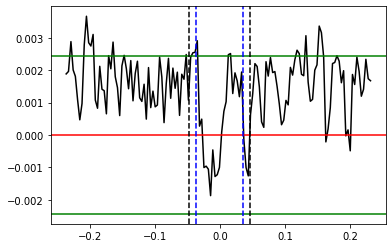

In [49]:
'''修正transit 190'''
file_name_test = "KIC_17-trans_190-5s_sub.txt"
data_test = np.loadtxt(file_name_test)
time = pd.Series(data_test[:,0])
flux = pd.Series(data_test[:,1])
lower_lim = data_test[0,4] # 3 sigma
higher_lim = data_test[0,5] # 3 sigma
L_bond = data_test[0,6] # ingress bound
R_bond = data_test[0,7] # egress bound
cL_bond = data_test[0,8] # left central bound
cR_bond = data_test[0,9] # right central bound

plt.plot(time,flux,'k-')
plt.axhline(y=lower_lim,color='g')
plt.axhline(y=higher_lim,color='g')
plt.axhline(y=0,color='r')
plt.axvline(x=L_bond,color='k',linestyle='--')
plt.axvline(x=R_bond,color='k',linestyle='--')
plt.axvline(x=cL_bond,color='b',linestyle='--')
plt.axvline(x=cR_bond,color='b',linestyle='--')

plt.show()

In [48]:
''' try to write as a for loop with a single but double spot file'''
exist = []
'''spot test-1'''
### time in central range ###
x_time_c = time[time>=cL_bond][time<=cR_bond][flux>=higher_lim]
y_flux_c = flux[time>=cL_bond][time<=cR_bond][flux>=higher_lim]
### find the peak time ###
if len(y_flux_c)!= 0:
    x_peak = float(x_time_c[y_flux_c==max(y_flux_c)]) # time at flux peak 
    y_peak = float(y_flux_c[y_flux_c==max(y_flux_c)]) # flux peak 

#     plt.plot(x_peak,y_peak,'r.') # peak point

    '''spot test-2'''
    ### split peak into 2 parts ###
    time_L = np.array(time[time<=x_peak])
    flux_L = np.array(flux[time<=x_peak])
    time_R = np.array(time[time>=x_peak])
    flux_R = np.array(flux[time>=x_peak])
    ### find the first point under y = 0 line from the peak###
    left_edge = []
    left_edge_flux = []
    for i_tL,v_fL in enumerate(flux_L): # left part
        if flux_L[-i_tL] <= 0 and i_tL != 0:
            left_edge.append(time_L[-i_tL])
            left_edge_flux.append(flux_L[-i_tL])
    #         print(time_L[-i_tL])
    #         print(time_L[-i_tL],flux_L[-i_tL])
    right_edge = []    
    right_edge_flux = []
    for i_tR,v_fR in enumerate(flux_R): # right part
        if flux_R[i_tR] <= 0 and i_tR != 0:
            right_edge.append(time_R[i_tR])
            right_edge_flux.append(flux_R[i_tR])
    #         print(time_R[i_tR],flux_R[i_tR])

    ### check the spot exist ###
    time_dur = time[time>=left_edge[0]][time<=right_edge[0]].values # time_duration for spot/spot
    flux_dur = flux[time>=left_edge[0]][time<=right_edge[0]].values # flux of time_duration for spot/spot
    if len(time_dur) >= 3: # check
        
        '''spot test-3'''
        time2 = time[(time<=time_dur[0])|(time>=time_dur[-1])]
        flux2 = flux[(time<=time_dur[0])|(time>=time_dur[-1])]

        # while max(flux2)<=higher_lim:

        ### time in central range ###
        x_time_c2 = time2[time2>=cL_bond][time2<=cR_bond][flux2>=higher_lim]
        y_flux_c2 = flux2[time2>=cL_bond][time2<=cR_bond][flux2>=higher_lim]


        ### find the peak time ###
        if len(y_flux_c2)!= 0:
            x_peak2 = float(x_time_c2[y_flux_c2==max(y_flux_c2)]) # time at flux peak 
            y_peak2 = float(y_flux_c2[y_flux_c2==max(y_flux_c2)]) # flux peak 

            ### split peak into 2 parts ###
            time2_L = np.array(time2[time2<=x_peak2])
            flux2_L = np.array(flux2[time2<=x_peak2])
            time2_R = np.array(time2[time2>=x_peak2])
            flux2_R = np.array(flux2[time2>=x_peak2])
            ### find the first point under y = 0 line from the peak###
            left_edge2 = []
            left_edge2_flux = []
            for i_tL,v_fL in enumerate(flux2_L): # left part
                if flux2_L[-i_tL] <= 0 and i_tL != 0:
                    left_edge2.append(time2_L[-i_tL])
                    left_edge2_flux.append(flux2_L[-i_tL])
            #         print(time_L[-i_tL])
            #         print(time_L[-i_tL],flux_L[-i_tL])
            right_edge2 = []    
            right_edge2_flux = []
            for i_tR,v_fR in enumerate(flux2_R): # right part
                if flux2_R[i_tR] <= 0 and i_tR != 0:
                    right_edge2.append(time2_R[i_tR])
                    right_edge2_flux.append(flux2_R[i_tR])
            #         print(time_R[i_tR],flux_R[i_tR])

            ### check the spotula exist ###
            time_dur2 = time2[time2>=left_edge2[0]][time2<=right_edge2[0]].values # time_duration for spot/spot
            if len(time_dur2) >= 3: # check
                exist_txt = 2
    #             print(exist_txt)
            else:
                exist_txt = 1
    #             print(exist_txt)
    
            exist.append(exist_txt)
        else:
            exist_txt = 1
            exist.append(exist_txt)
    else:
        exist_txt = 0
        exist.append(exist_txt)
else:
    exist_txt = 0
    exist.append(exist_txt)
        
print(exist)

IndexError: list index out of range

In [10]:
spot_number = sum(exist_spot)+1 # 多 +1 是因為transit 190
print(spot_number)

237


In [11]:
'''spot/fac ratio'''
spot_number/fac_number

0.8315789473684211

In [15]:
fac_number/spot_number

1.2025316455696202

In [12]:
spot_number,fac_number

(237, 285)

In [13]:
'''save as .txt file'''
table_ratio = pd.DataFrame([],columns = ['spot','facula'])
# table_ratio['NO'] = pd.Series(NO)
table_ratio['spot'] = pd.Series(exist_spot)
table_ratio['facula'] = pd.Series(exist_fac)
# np.savetxt("simGrid-rA100.txt",table_simGrid_LP)

In [14]:
table_ratio

,spot,facula
0,0,0
1,0,0
2,1,1
3,1,0
4,0,0
...,...,...
393,0,1
394,0,1
395,2,1
396,1,1


In [29]:
237/400,285/400

(0.5925, 0.7125)